# Introdução

Este conteúdo é parte de uma das tarefas deixada numa disciplina introdutória de machine learning. Nela vamos aplicar alguns métodos de classificação a partir de uma base de dados que contem transações bancarias 

In [3]:
import numpy as np
import pandas as pd

# Import data
data = pd.read_csv("data_fraude.csv")
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1.176563,0.323798,0.536927,1.047002,-0.368652,-0.728586,0.084678,-0.069246,-0.266389,0.155315,...,-0.109627,-0.341365,0.057845,0.499180,0.415211,-0.581949,0.015472,0.018065,4.67,0
1,0.681109,-3.934776,-3.801827,-1.147468,-0.735540,-0.501097,1.038865,-0.626979,-2.274423,1.527782,...,0.652202,0.272684,-0.982151,0.165900,0.360251,0.195321,-0.256273,0.056501,912.00,0
2,1.140729,0.453484,0.247010,2.383132,0.343287,0.432804,0.093380,0.173310,-0.808999,0.775436,...,-0.003802,0.058556,-0.121177,-0.304215,0.645893,0.122600,-0.012115,-0.005945,1.00,0
3,-1.107073,-3.298902,-0.184092,-1.795744,2.137564,-1.684992,-2.015606,-0.007181,-0.165760,0.869659,...,0.130648,0.329445,0.927656,-0.049560,-1.892866,-0.575431,0.266573,0.414184,62.10,0
4,-0.314818,0.866839,-0.124577,-0.627638,2.651762,3.428128,0.194637,0.670674,-0.442658,0.133499,...,-0.312774,-0.799494,-0.064488,0.953062,-0.429550,0.158225,0.076943,-0.015051,2.67,0


Determinemos a porcentagem das observações no conjunto de dados que são casos de fraude

In [5]:
def porcentagem_fraude():
    
    # Contando o número de instâncias de fraude (onde 'Class' == 1)
    fraud_count = data[data['Class'] == 1].shape[0]
    
    # Número total de observações
    total_count = data.shape[0]
    
    # Calculando a porcentagem de instâncias de fraude
    fraud_percentage = fraud_count / total_count
    
    return fraud_percentage
porcentagem_fraude()

0.016410823768035772

Criando os X_train, X_test, y_train, y_test para os caculos 

In [6]:
from sklearn.model_selection import train_test_split

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

Usando X_train, X_test, y_train e y_test (conforme definido acima), vamos treinar um classificador fictício que classifica tudo como a classe majoritária dos dados de treinamento. 

In [7]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, recall_score

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
    
# Fazendo previsões
y_pred_clf = dummy_clf.predict(X_test)

Vejamos qual é a exatidão deste classificador e seu recall


In [8]:
print('Exatidão do classificador: {:.2f}'
     .format(accuracy_score(y_test, y_pred_clf)))
print('Recall do classificador: {:.2f}'
     .format(recall_score(y_test, y_pred_clf)))


Exatidão do classificador: 0.99
Recall do classificador: 0.00


Agora treinemos um classificador SVC usando os parâmetros padrão.

In [9]:
from sklearn.metrics import precision_score
from sklearn.svm import SVC

# Treinando o classificador SVC usando parâmetros padrão
svc_clf = SVC()
svc_clf.fit(X_train, y_train)

# Fazendo previsões
y_pred_svc = svc_clf.predict(X_test)

 Calculemos a exatidão, recall e precisão deste classificador

In [10]:
print('Exatidão do classificador: {:.2f}'
     .format(accuracy_score(y_test, y_pred_svc)))
print('Recall do classificador: {:.2f}'
     .format(recall_score(y_test, y_pred_svc)))
print('Precisão do classificador: {:.2f}'
     .format(precision_score(y_test, y_pred_svc)))

Exatidão do classificador: 0.99
Recall do classificador: 0.35
Precisão do classificador: 0.93


Usando o classificador SVC com parâmetros {'C': 1e9, 'gamma': 1e-07}

In [11]:
svc_clf = SVC(C=1e9, gamma=1e-07)
svc_clf.fit(X_train, y_train)

SVC(C=1000000000.0, gamma=1e-07)

Calculemos a matriz de confusão ao usar um limite de -220 na função de decisão

In [12]:
def matriz_confusao():
    from sklearn.metrics import confusion_matrix
    
    # Obtendo pontuações da função de decisão no conjunto de testes
    y_scores = svc_clf.decision_function(X_test)
    
    # Aplicando limite às pontuações da função de decisão
    y_pred_thresholded = (y_scores > -220).astype(int)
    
    # Calculando matriz de confusão
    cm = confusion_matrix(y_test, y_pred_thresholded)
    
    return cm
matriz_confusao()

array([[5320,   24],
       [  14,   66]], dtype=int64)

Treinemos um classificador de regressão logística

In [14]:
from sklearn.linear_model import LogisticRegression

# Treinando o classificador de regressão logística
log_reg = LogisticRegression(max_iter=1500, random_state = 0)
log_reg.fit(X_train, y_train)
    
# Estimativas de probabilidade para X_test
y_prob = log_reg.predict_proba(X_test)[:, 1]

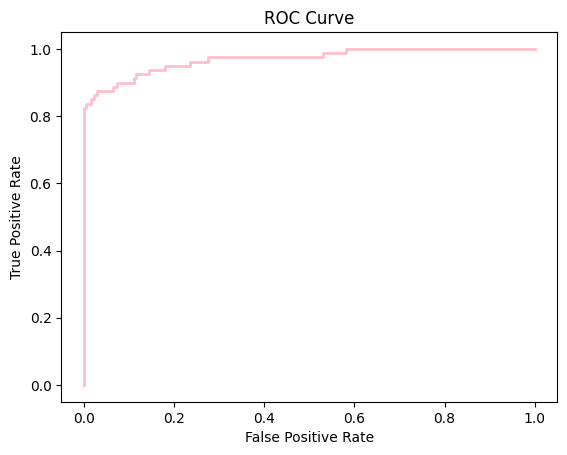

In [15]:
from sklearn.metrics import  RocCurveDisplay, roc_curve
import matplotlib.pyplot as plt

# Calculando a curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Plotando a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='pink', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

Para este classificador vamos criar uma curva de recall de precisão e uma curva roc usando y_test e y_prob (a estimativa de probabilidade para X_test, probabilidade de ser fraude). Posterimente, vamos criar uma função que para a curva de recuperação de precisão, determina qual é a recuperação quando a precisão é 0,75. Alem disso, para a curva roc determina a taxa de verdadeiros positivos quando a taxa de falsos positivos é 0,16.

Esta função retornará uma tupla da seguente estrutura (recall, taxa verdadeira positiva).

In [19]:
def recall_true_pos_rate():
    from sklearn.metrics import precision_recall_curve

    # Calculando a curva de recuperação de precisão
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    
    # Encontrando o recall quando a precisão for 0,75
    recall_at_precision_075 = recall[np.where(precision >= 0.75)][0]
    
    # Encontrando a taxa de verdadeiros positivos quando a taxa de falsos positivos for 0,16
    idx = np.argmin(np.abs(fpr - 0.16))
    tpr_at_fpr_016 = tpr[idx]
    
    return (recall_at_precision_075, tpr_at_fpr_016)
recall_true_pos_rate()

(0.825, 0.925)

Vamos realizar uma pesquisa de grade sobre os parâmetros listados abaixo para um classificador de regressão logística (com solver='liblinear'), usando recall para pontuação e a validação cruzada tripla padrão 

'penalidade': ['l1', 'l2']

'C':[0,01, 0,1, 1, 10]

Note que em .cv_results_, criamos uma matriz das pontuações médias dos testes de cada combinação de parâmetros, da seguente forma

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|

<br>


In [17]:
def matriz_penalidade():    
    from sklearn.model_selection import GridSearchCV

    param_grid = {'penalty': ['l1', 'l2'],
                  'C': [0.01, 0.1, 1, 10]}
    
    # Inicializando o classificador de regressão logística
    log_reg = LogisticRegression(solver='liblinear')
    
    # Realizando pesquisa em grade com pontuação de recall
    grid_search = GridSearchCV(log_reg, param_grid, scoring='recall')
    grid_search.fit(X_train, y_train)
    
    # Extraindo as pontuações médias dos testes de cada combinação de parâmetros
    mean_test_scores = grid_search.cv_results_['mean_test_score']
    
    # Remodelando as pontuações médias dos testes em uma matriz numpy 4x2
    mean_test_scores_array = np.array(mean_test_scores).reshape(4, 2)
    
    return mean_test_scores_array
    
pontos=matriz_penalidade()
print(pontos)

[[0.69558442 0.77168831]
 [0.80792208 0.81155844]
 [0.80428571 0.81149351]
 [0.80064935 0.80064935]]


A função a seguir ajuda a visualizar os resultados da pesquisa em grade feita anteriormente

In [18]:
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(4,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10])
    plt.yticks(rotation=0)
    plt.show()

GridSearch_Heatmap(pontos)

<IPython.core.display.Javascript object>